In [51]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns

from PIL import Image
from skimage import io
from skimage.color import rgb2gray

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

%matplotlib inline

In [2]:
data = pd.read_csv("data/train_set.csv")
data.head()

,label,id_img,path
0,happy,22373,happy/22373.jpg
1,happy,21433,happy/21433.jpg
2,happy,12418,happy/12418.jpg
3,happy,21278,happy/21278.jpg
4,happy,8081,happy/08081.jpg


In [3]:
data.label.value_counts()

happy      3285
sadness    2891
Name: label, dtype: int64

In [4]:
# To check the array structure
_ = imread("data/train/" + data.iloc[0, 2])
_

array([[ 25,  44,  56, ...,  34,  11,  17],
       [ 30,  46,  54, ...,  45,  19,  17],
       [ 38,  50,  55, ...,  53,  25,  12],
       ...,
       [110, 116, 129, ...,  40,  63,  34],
       [110, 138, 135, ...,  51,  52,  30],
       [ 93, 142, 127, ...,  73,  48,  33]], dtype=uint8)

In [57]:
# New column with the pictures found in every path (in array form)
data["X"] = data.path.apply(lambda x: imread("data/train/" + x))
# Scaling down the data by dividing by 255
data["X"] = data["X"] / 255

# Replacing the labels by numbers to pass them into the model
data["label"].replace(["happy", "sadness"], [1, 0], inplace = True)

data.head(2)

,label,id_img,path,X
0,1,22373,happy/22373.jpg,"[[0.09803921568627451, 0.17254901960784313, 0...."
1,1,21433,happy/21433.jpg,"[[0.12941176470588237, 0.11372549019607843, 0...."


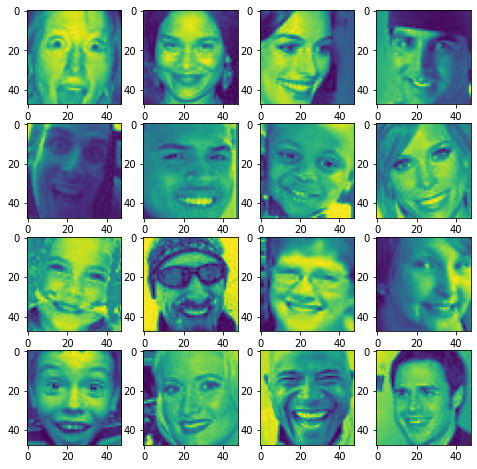

In [58]:
# Let's see some examples after the transformation
fig, axes = plt.subplots(4, 4, figsize=(8,8))

for i, ax in enumerate(axes.flat):
    ax.imshow(X[i])

In [59]:
# Dependent variables
X = np.array(list(data.iloc[:, 3].values))
X = X.reshape(6176, 48, 48, 1)

# Independent variable
y = np.array(data.iloc[:, 0])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

print("X shape", X.shape)
print("y shape", y.shape)

X shape (6176, 48, 48, 1)
y shape (6176,)


In [60]:
model = models.Sequential([
    layers.Conv2D(filters = 8,
                  kernel_size = (3, 3),
                  input_shape = (48, 48, 1),
                  padding = "same"),
    layers.MaxPool2D((2, 2)),
    layers.Dropout(.25),
    layers.Flatten(),
    layers.Dense(32, activation = "relu"),
    layers.Dense(1, activation = "sigmoid")
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_history = model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
155/155 [==============================] - 3s 16ms/step - loss: 0.6729 - accuracy: 0.5866
Epoch 2/10
155/155 [==============================] - 2s 14ms/step - loss: 0.6172 - accuracy: 0.6688
Epoch 3/10
155/155 [==============================] - 2s 14ms/step - loss: 0.5786 - accuracy: 0.7045
Epoch 4/10
155/155 [==============================] - 2s 13ms/step - loss: 0.5456 - accuracy: 0.7279
Epoch 5/10
155/155 [==============================] - 2s 13ms/step - loss: 0.5168 - accuracy: 0.7468
Epoch 6/10
155/155 [==============================] - 2s 12ms/step - loss: 0.4839 - accuracy: 0.7660
Epoch 7/10
155/155 [==============================] - 2s 11ms/step - loss: 0.4551 - accuracy: 0.7832
Epoch 8/10
155/155 [==============================] - 2s 11ms/step - loss: 0.4229 - accuracy: 0.8049
Epoch 9/10
155/155 [==============================] - 2s 12ms/step - loss: 0.3920 - accuracy: 0.8206
Epoch 10/10
155/155 [==============================] - 2s 12ms/step - loss: 0.3547 - accura

In [61]:
model.evaluate(X_test, y_test)

39/39 [==============================] - 0s 6ms/step - loss: 0.5267 - accuracy: 0.7484


[0.5267016887664795, 0.7483818531036377]

[[412 155]
 [156 513]]


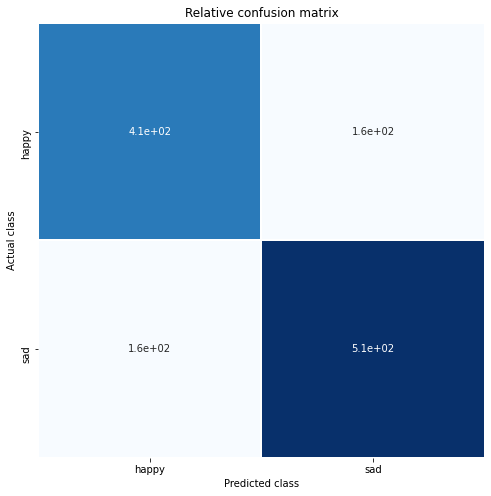

In [87]:
# Predictions
predictions = model.predict(X_test)
# Transforming the prediction to 1s and 0s for better comparison
predictions = [1 if pred > .5 else 0 for pred in predictions]

# Confusion matrix
cm = confusion_matrix(predictions, y_test)

print(cm)

# Plotting the confusion matrix
fig, ax1 = plt.subplots(1, 1, figsize = (8, 8))

labels = ["happy", "sad"]

sns.heatmap(cm, annot = True, linewidths = .1, cmap = "Blues", ax = ax1, cbar = False, xticklabels = labels, yticklabels = labels)
ax1.set_xlabel("Predicted class")
ax1.set_ylabel("Actual class")
ax1.set_title("Relative confusion matrix")
plt.show()

In [63]:
test_data = pd.read_csv("data/test_set.csv")
test_data.head()

,id_img,path
0,18341,test/18341.jpg
1,13176,test/13176.jpg
2,23945,test/23945.jpg
3,15968,test/15968.jpg
4,18382,test/18382.jpg


In [64]:
# I do the same transformations to the test data as I did to the training one
test_data["X"] = test_data.path.apply(lambda x: imread("data/" + x))
test_data["X"] = test_data["X"] / 255
test_data.head(2)

,id_img,path,X
0,18341,test/18341.jpg,"[[0.48627450980392156, 0.27058823529411763, 0...."
1,13176,test/13176.jpg,"[[0.027450980392156862, 0.011764705882352941, ..."


In [83]:
# Packing the data into arrays for the model
test_X = np.array(list(test_data.iloc[:, 2].values))
test_X = test_X.reshape(4117, 48, 48, 1)

# I take the ids for later
id_ = test_data.id_img

# Predictions
test_predictions = model.predict(test_X)
# Encoding the predictions
test_predictions = ["happy" if pred > .5 else "sadness" for pred in test_predictions]

# Preparing data for submission
to_submit = pd.DataFrame(test_predictions, index = id_, columns = ["label"])
to_submit

,label
id_img,
18341,happy
13176,happy
23945,sadness
15968,happy
18382,happy
...,...
8966,happy
12111,sadness
16629,happy


In [84]:
to_submit.to_csv("submissions/submission1.csv")

In [85]:
# To save the model
model.save("models/model1")

INFO:tensorflow:Assets written to: models/model1/assets


In [86]:
# To load the model
loaded_model = keras.models.load_model("models/model1")
loaded_model.predict(X_test)

array([[0.73904216],
       [0.9272175 ],
       [0.23415491],
       ...,
       [0.9351783 ],
       [0.634542  ],
       [0.11961851]], dtype=float32)